# STEAM VIDEO GAMES RECOMMENDATION SYSTEM

we need to recommend the similar games to the user based on their behaviour

#About dataset
This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

steam-200k - (199999, 5)

# Columns in dataset
user-id

game-title

behavior-name

value

0

In [ ]:
# import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Read csv file using pandas
df = pd.read_csv('steam-200k.csv')
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


# EDA

In [ ]:
# remane the column name as games user_id, hoursplay and status
df.rename(columns = { '151603712':'user_id' ,'The Elder Scrolls V Skyrim':'games', 'purchase':'status', '1.0':'hoursplay' }, inplace = True)

In [ ]:
df = pd.DataFrame(df)
df

,user_id,games,status,hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


In [ ]:
#drop 0 column
df = df.drop(['0'],axis=1)
df.head()

,user_id,games,status,hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9


In [ ]:
#drop duplicate user_id and games keep the last one
df.drop_duplicates(subset=['user_id','games'],keep='last')

,user_id,games,status,hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,play,87.0
4,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,play,8.9
...,...,...,...,...
199990,128470551,Fallen Earth,play,2.4
199992,128470551,Magic Duels,play,2.2
199994,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,play,1.5


In [ ]:
#check the shape of the dataset
df.shape

(199999, 4)

In [ ]:
#check columns of the dataset
df.columns

Index(['user_id', 'games', 'status', 'hoursplay'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    199999 non-null  int64  
 1   games      199999 non-null  object 
 2   status     199999 non-null  object 
 3   hoursplay  199999 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


In [ ]:
# Check for missing values in all the columnns of the train_dataset
df.isnull().sum()

user_id      0
games        0
status       0
hoursplay    0
dtype: int64

In [ ]:
# get how many unique values are in games column of dataset
df.nunique()

user_id      12393
games         5155
status           2
hoursplay     1593
dtype: int64

In [ ]:
# get the total count of play and total count of purchase
df['status'].value_counts()

purchase    129510
play         70489
Name: status, dtype: int64

In [ ]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
df.describe()

,user_id,hoursplay
count,1.999990e+05,199999.000000
mean,1.036556e+08,17.874468
std,7.208084e+07,138.057292
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


## visualizing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2db6f33e90>,
      dtype=object)

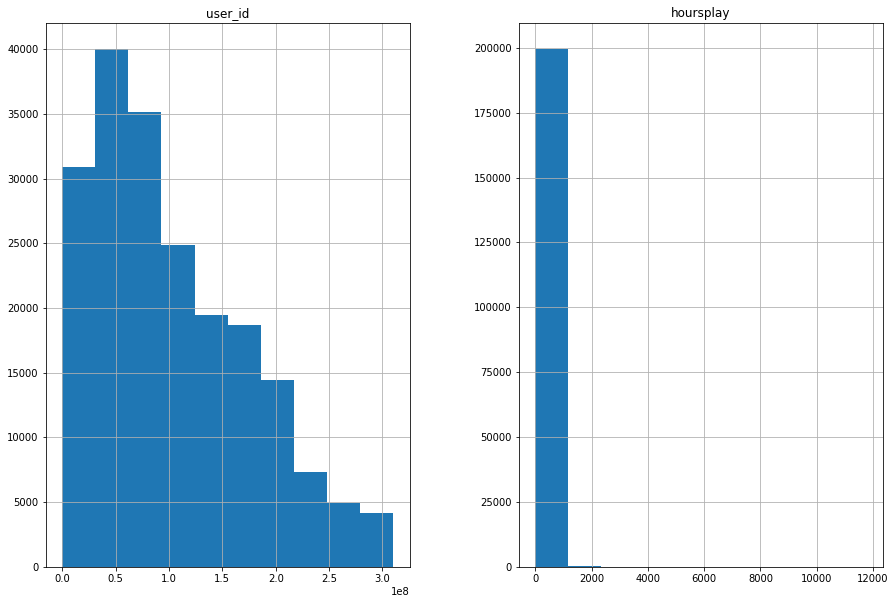

In [ ]:
# Histogram using pandas 
df.hist(figsize=(15,10))

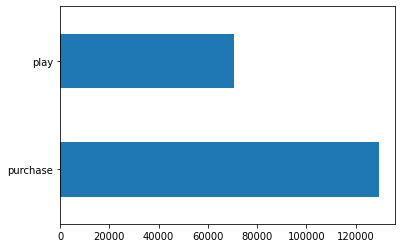

In [ ]:
# plot a horizontal bar plot of column status
df['status'].value_counts().plot(kind='barh')

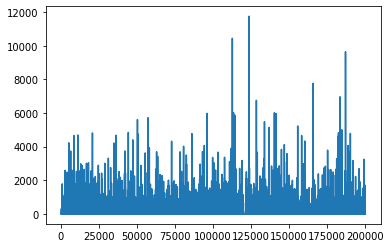

In [ ]:
#plot a count plot of hoursplay column
df['hoursplay'].plot()

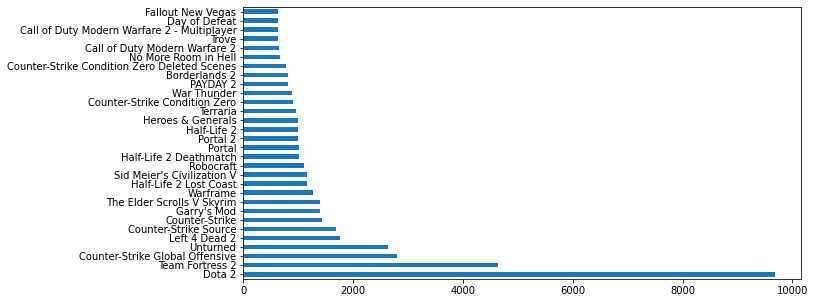

In [ ]:
# plot a horizontal bar plot of games column for top 30 games

df['games'].value_counts().head(30).plot(kind='barh', figsize=(10,5))


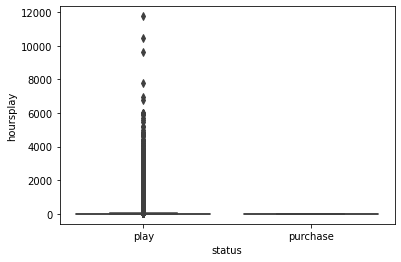

In [ ]:
# plot a boxplot of status as x-axis and hoursplay as y-axis
sns.boxplot(x='status',y='hoursplay',data = df)

# converting hours to rating

In [ ]:
# convert the hoursplay into rating
df = df[(df['hoursplay']>=2) & (df['status']=='play')]
df_filtered = df[df.groupby('games').user_id.transform(len)>=20]
df_filtered['games'].nunique()
df_filtered.head(20)

df_filtered['user_id'] = df_filtered['user_id'].astype(str)
averages = df_filtered.groupby(['games'],as_index=False).hoursplay.mean()
averages['avg_hoursplay'] = averages['hoursplay']
averages.drop('hoursplay',axis=1,inplace=True)

final_ratings = pd.merge(df_filtered, averages[['games','avg_hoursplay']],on='games')
condition = [
             (final_ratings['hoursplay']>=0.8*final_ratings['avg_hoursplay']),
             (final_ratings['hoursplay']>=0.6*final_ratings['avg_hoursplay'])&(final_ratings['hoursplay']<0.8*final_ratings['avg_hoursplay']),
             (final_ratings['hoursplay']>=0.4*final_ratings['avg_hoursplay'])&(final_ratings['hoursplay']<0.6*final_ratings['avg_hoursplay']),
             (final_ratings['hoursplay']>=0.2*final_ratings['avg_hoursplay'])&(final_ratings['hoursplay']<0.4*final_ratings['avg_hoursplay']),
             final_ratings['hoursplay']>=0,
             ]

values=[5,4,3,2,1]
final_ratings['rating'] = np.select(condition, values)
final_ratings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,user_id,games,status,hoursplay,avg_hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5
...,...,...,...,...,...,...
36540,51822361,"Warhammer 40,000 Dawn of War Soulstorm",play,23.0,14.109091,5
36541,38317154,"Warhammer 40,000 Dawn of War Soulstorm",play,5.5,14.109091,2
36542,36404933,"Warhammer 40,000 Dawn of War Soulstorm",play,5.8,14.109091,3
36543,87201181,"Warhammer 40,000 Dawn of War Soulstorm",play,24.0,14.109091,5


In [ ]:
# keep only important columns( user_id, games,rating ) drop everthing else 
final_ratings = final_ratings.drop(['status','hoursplay','avg_hoursplay'],axis=1)

# MEMORY BASED COLLABORATIVE FILTERING

Memory-based algorithms approach the collaborative filtering problem by using the entire database.It tries to find users that are similar to the active user (i.e. the users we want to make predictions for), and uses their preferences to predict ratings for the active user.

In [ ]:
#import pairwise_distances, cosine, corelation
from sklearn.metrics.pairwise import cosine_similarity,pairwise_distances

In [ ]:
# create pivot table containing user_id as index, games as columns, ratings as values
user_item = pd.pivot_table(final_ratings,values='rating',index='user_id',columns='games')


In [ ]:
#check shape of pivot table
print(user_item.shape)
#check first five rows of pivot table
print(user_item.head())

(8315, 431)
games      7 Days to Die  APB Reloaded  ARK Survival Evolved  Ace of Spades  \
user_id                                                                       
100053304            NaN           NaN                   NaN            NaN   
100057229            NaN           NaN                   NaN            NaN   
100070732            NaN           NaN                   NaN            NaN   
100096071            NaN           NaN                   NaN            NaN   
100168166            NaN           NaN                   NaN            NaN   

games      AdVenture Capitalist  Aftermath  Age of Chivalry  \
user_id                                                       
100053304                   NaN        NaN              NaN   
100057229                   NaN        NaN              NaN   
100070732                   NaN        NaN              NaN   
100096071                   NaN        NaN              NaN   
100168166                   NaN        NaN              

In [ ]:
## Note: As we are subtracting the mean from each rating to standardize
##all users with only one rating or who had rated everything the same will be dropped
# Normalize the values in pivot table
piv_norm = user_item.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)),axis=1)

# Drop all columns containing only zeros representing users who did not rate

piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm !=0).any(axis=0)]

In [ ]:
# import scipy, operator
import operator
import scipy

In [ ]:
# convert the data into sparse matrix format to be read by the following functions
dense_matrix = np.array(piv_norm.to_numpy(), dtype=bool).astype(np.int)
sparse_matrix = scipy.sparse.csr_matrix(dense_matrix)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# create matrices to show the computed cosine similarity values between each user/user array pair and item/item array pair.

item_sim = cosine_similarity(sparse_matrix)
user_sim = cosine_similarity(sparse_matrix.T)

In [ ]:
# Inserting the similarity matricies into dataframe objects

#item similarity dataframe
item_sim_df = pd.DataFrame(item_sim, index= piv_norm.index, columns = piv_norm.index)
#user similarity dataframe
user_sim_df = pd.DataFrame(user_sim, index = piv_norm.columns , columns = piv_norm.columns)

In [ ]:
# write a function which will return the top 10 games with the highest cosine similarity value

def top_game(game):
  count=1
  print('Similar games to {} include:\n'.format(game))
  for item in item_sim_df.sort_values(by= game, ascending= False).index[1:11]:
    print('No. {}: {}'.format(count, item))
    count += 1



In [ ]:
top_game('Aftermath')

Similar games to Aftermath include:

No. 1: Trove
No. 2: Unturned
No. 3: theHunter
No. 4: Warface
No. 5: Dirty Bomb
No. 6: Heroes & Generals
No. 7: Counter-Strike Global Offensive
No. 8: Rust
No. 9: SMITE
No. 10: Infestation Survivor Stories


In [ ]:
# check the column of pivot table
piv_norm.columns

Index(['100057229', '100096071', '100311267', '100322840', '100351493',
       '100359523', '100431715', '100444456', '100519466', '100630947',
       ...
       '994489', '9946133', '99484728', '99640715', '99704390', '99711581',
       '99713453', '99723205', '99766416', '99802512'],
      dtype='object', name='user_id', length=3059)

In [ ]:
# write a function which will return the top 5 users with the highest similarity value 

def top_users(user):

  if user not in piv_norm.columns:
    return('No data available on user {}'.format(user))

  print('Most similar Users:\n')
  sim_values = user_sim_df.sort_values(by=user, ascending = False).loc[:,user].tolist()[1:11]
  sim_users = user_sim_df.sort_values(by=user, ascending= False).index[1:11]

  zipped = zip(sim_users, sim_values,)
  for user, sim in zipped:
    print('User #(0), Similarity value: {1:.2f}'.format(user,sim))



In [ ]:
top_users('99484728')

Most similar Users:

User #(0), Similarity value: 0.82
User #(0), Similarity value: 0.77
User #(0), Similarity value: 0.67
User #(0), Similarity value: 0.67
User #(0), Similarity value: 0.67
User #(0), Similarity value: 0.61
User #(0), Similarity value: 0.58
User #(0), Similarity value: 0.58
User #(0), Similarity value: 0.58
User #(0), Similarity value: 0.58


In [ ]:
# write a function which constructs a list of lists containing the highest rated games per similar user
# and returns the name of the game along with the frequency it appears in the list
def similar_user_recs(user):

  if user not in piv_norm.columns:
    return('No data avaiable on user {}'.format(user))

  sim_users = user_sim_df.sort_values(by=user, ascending = False).index[1:11]
  best= []
  most_common = {}

  for i in sim_users:
    max_score = piv_norm.loc[:, i].max()
    best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
  for i in range(len(best)):
    for j in best[i]:
      if j in most_common:
        most_common[j] += 1
      else:
        most_common[j] = 1
  sorted_list = sorted(most_common.items(), key= operator.itemgetter(1), reverse = True)
  return sorted_list[:5]


In [ ]:

similar_user_recs('100519466')

[('Team Fortress 2', 3),
 ('Robocraft', 3),
 ('Portal 2', 3),
 ("Garry's Mod", 3),
 ('Terraria', 2)]

# COLLABORATIVE FILTERING USING KNN

Collaborative Filtering Using k-Nearest Neighbors (kNN). kNN is a machine learning algorithm to find clusters of similar users based on common ratings, and make predictions using the average rating of top-k nearest neighbors.

https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/

In [ ]:
# import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute', n_neighbors=20, n_jobs=-1)

#make an object for the NearestNeighbors Class.

# fit the dataset
model_knn.fit(piv_norm)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)


Test model and make some recommendations:

In [ ]:
import random
# choose random game
query_index = np.random.choice(piv_norm.shape[0])
# print the name of random game
print("Choose game is: " , piv_norm.index[query_index])

# use kNN algorithm to measures distance to determine the closeness of instances.
distances, indices = model_knn.kneighbors(piv_norm.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 6)

# pick most popular games among the neighbors and print their names
for i in range(0, len(distances.flatten())):
  if i == 0:
    print('Recommendations for {0}: \n'.format(piv_norm.index[query_index]))
  else:
    print('{0}: {1}, with distance of {2}:'.format(i, piv_norm.index[indices.flatten()[i]], distances.flatten()[i]))

Choose game is:  Dishonored
Recommendations for Dishonored: 

1: Wolfenstein The New Order, with distance of 0.8672516892407047:
2: Mark of the Ninja, with distance of 0.8851616617103619:
3: Castle Crashers, with distance of 0.890836200580252:
4: Alien Isolation, with distance of 0.9101974277583976:
5: Metro Last Light, with distance of 0.9116619497123555:


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


#Conclusion

We can use different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend a lot of other things as well such as music, movies, books, news etc. 